# Customer Category

Lola Tamis also wants a table whose columns are each month covered by the transactional data and whose rows are the following metrics:
1. Repeaters - the number of customers from the current month who also purchased in the previous month. This metric is 0 for the earliest month in the transactional data.
2. Inactive - the number of customers in the total set of transactions up to and including the current month who have purchase history but do not have a purchase for the current month. This metric is 0 for the earliest month in the transactional data.
3. Engaged - the number of customers in the total set of transactions up to and including the current month who have consistently purchased every single month.


In [1]:
import json
import pandas as pd
import numpy as np

with open("transaction-data-adhoc-analysis.json","r") as f:
    tdata = json.load(f)

df = pd.DataFrame(tdata)
df['month'] = pd.DatetimeIndex(df['transaction_date']).month # https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

### Transactional Data

Base

In [2]:
# https://stackoverflow.com/questions/50765199/i-need-to-make-a-truth-table-from-pandas-dataframe-based-on-values-on-a-column

i, r = pd.factorize(df.name)
j, c = pd.factorize(df.month)
b = np.zeros((r.size, c.size), int)
b[i, j] = 1

df6 = pd.DataFrame(b, r, c)
df6

,1,2,3,4,5,6
Jennifer Campbell,1,1,1,0,0,1
Melissa Kim,1,1,1,1,1,0
Kristen Cooper,1,1,1,1,1,0
Alexander Davis,1,1,1,1,1,1
Michael Lowe,1,1,1,1,1,1
...,...,...,...,...,...,...
Patricia Carter,0,0,0,0,1,1
Ryan Stevens,0,0,0,0,1,1
Sonia Jones,0,0,0,0,1,0
Sue Douglas,0,0,0,0,0,1


In [3]:
sum1 = df6[[1]].sum(axis=1)
sum2 = df6[[1,2]].sum(axis=1)
sum3 = df6[[1,2,3]].sum(axis=1)
sum4 = df6[[1,2,3,4]].sum(axis=1)
sum5 = df6[[1,2,3,4,5]].sum(axis=1)
sum6 = df6[[1,2,3,4,5,6]].sum(axis=1)

__Engaged__

In [4]:
eng1 = df6[sum1 == 1]
eng2 = df6[sum2 == 2]
eng3 = df6[sum3 == 3]
eng4 = df6[sum4 == 4]
eng5 = df6[sum5 == 5]
eng6 = df6[sum6 == 6]

__New__

In [5]:
new1 = df6[sum1 == 1]
new2 = (df6[sum1 == 0] [df6[sum1 == 0][2]==1])
new3 = (df6[sum2 == 0] [df6[sum2 == 0][3]==1])
new4 = (df6[sum3 == 0] [df6[sum3 == 0][4]==1])
new5 = (df6[sum4 == 0] [df6[sum4 == 0][5]==1])
new6 = (df6[sum5 == 0] [df6[sum5 == 0][6]==1])

__Inactive__

In [6]:
inac2 = (df6[sum2 != 0] [df6[sum2 != 0][2]==0])
inac3 = (df6[sum3 != 0] [df6[sum3 != 0][3]==0])
inac4 = (df6[sum4 != 0] [df6[sum4 != 0][4]==0])
inac5 = (df6[sum5 != 0] [df6[sum5 != 0][5]==0])
inac6 = (df6[sum6 != 0] [df6[sum6 != 0][6]==0])

__Repeater__

In [7]:
rep2 = df6[df6[[1,2]].sum(axis=1) == 2]
rep3 = df6[df6[[2,3]].sum(axis=1) == 2]
rep4 = df6[df6[[3,4]].sum(axis=1) == 2]
rep5 = df6[df6[[4,5]].sum(axis=1) == 2]
rep6 = df6[df6[[5,6]].sum(axis=1) == 2]

### Table

In [8]:
table = pd.DataFrame(
    {'January': [0,0,len(eng1),len(new1)],
     'February': [len(rep2),len(inac2),len(eng2),len(new2)],
     'March': [len(rep3),len(inac3),len(eng3),len(new3)],
     'April': [len(rep4),len(inac4),len(eng4),len(new4)],
     'May': [len(rep5),len(inac5),len(eng5),len(new5)],
     'June': [len(rep6),len(inac6),len(eng6),len(new6)],
    }, index = pd.Index(['Repeaters','Inactive','Engaged','New']))

compiled = table.rename_axis('Category')
compiled

,January,February,March,April,May,June
Category,,,,,,
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190
New,6588,1459,322,96,20,2


## Analysis

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

#### Charts per Category

<function matplotlib.pyplot.show(close=None, block=None)>

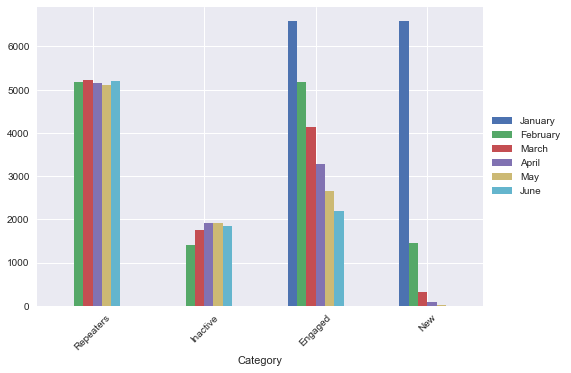

In [34]:
compiled.plot(y=["January", "February", "March", "April", "May", "June"], kind="bar",rot=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas
plt.show

__Repeaters__

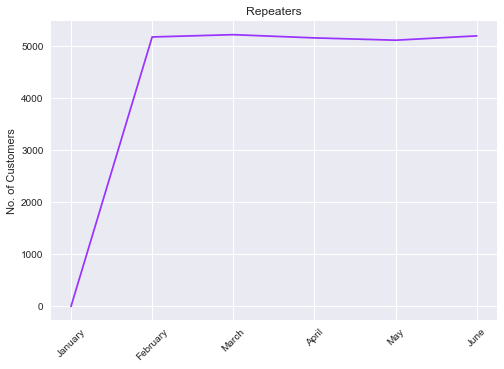

In [30]:
row = compiled.iloc[0]
row.plot(kind='line', rot=45, color='#9933FF')
plt.ylabel("No. of Customers")
plt.title("Repeaters")
plt.show()

__Inactive__

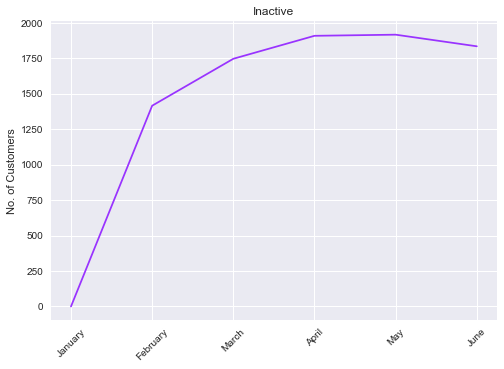

In [11]:
row = compiled.iloc[1]
row.plot(kind='line', rot=45, color='#9933FF')
plt.ylabel("No. of Customers")
plt.title("Inactive")
plt.show()

__Engaged__

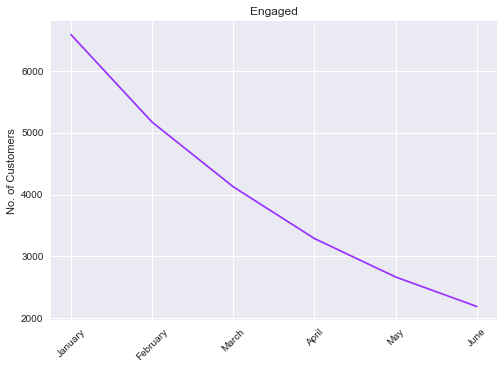

In [12]:
row = compiled.iloc[2]
row.plot(kind='line', rot=45,color='#9933FF')
plt.ylabel("No. of Customers")
plt.title("Engaged")
plt.show()

__New__

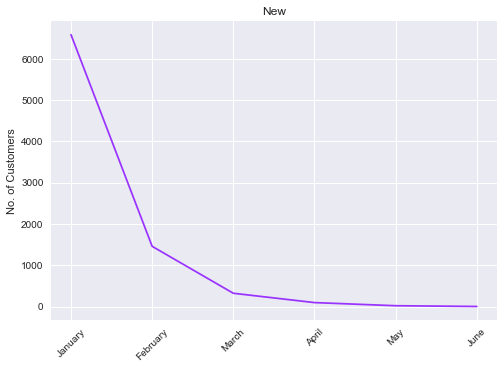

In [13]:
row = compiled.iloc[3]
row.plot(kind='line', rot=45,color='#9933FF')
plt.ylabel("No. of Customers")
plt.title("New")
plt.show()

#### Category Data per Month

array([<AxesSubplot:xlabel='Category'>, <AxesSubplot:xlabel='Category'>,
       <AxesSubplot:xlabel='Category'>, <AxesSubplot:xlabel='Category'>,
       <AxesSubplot:xlabel='Category'>, <AxesSubplot:xlabel='Category'>],
      dtype=object)

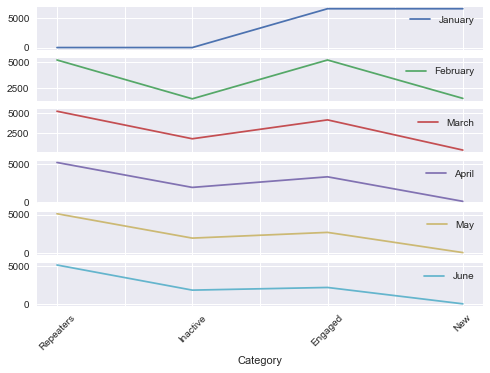

In [32]:
axes = compiled.plot.line(rot=45, subplots=True)
axes